<a href="https://colab.research.google.com/github/Pyeonseohee/PSH/blob/main/01_LA_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy

* In order to handle linear algebra by python, [**Numpy**](https://numpy.org/) is most common package!
* [**Numpy**](https://numpy.org/) is the fundametal package for scientific computing with python.

Python에서 가장 기본적인 모듈이라고 볼 수 있음.

We can check the version of [**Numpy**](https://numpy.org/)


In [ ]:
import numpy as np

np.__version__

'1.18.5'

# Sympy

We also use the [Sympy](https://www.sympy.org/en/index.html). It is a python library for symbolic mathematics.

## Symbolic computation

> matlab의 symbolic math와 같이, 대수 기호가 들어간 수식을 다루기 위해 개발된 python 기반의 패키지(모듈).
> * $\pi$와 같이 무한한 수를 기호로 표시하여 계산하는 것으로 보통 사람이 푸는 형태로 수식을 풀어냄.
> * 즉, symbolic 연산은 **사람이 symbol을 이용하여 방정식을 푸는 것처럼 컴퓨터에서도 symbol을 이용하여 방정식을 푸는 것**을 의미.

**Symbolic computation** deals with the computation of mathematical objects symbolically. This means that 
* the mathematical objects are represented exactly, not approximately, and 
* mathematical expressions with unevaluated variables are left in symbolic form.

## Computer Algebra System (CAS)

* 일반적인 수치해석적으로 수식을 푸는 것이 아닌, symbolic computation을 구현하여 수학 기호로 구성된 수식을 처리할 수 있는 S/W들을 가르킴.
* Mathematica, Sage등이 대표적임.
* Python의 Sympy 모듈 역시 CAS 중 하나라고 볼 수 있음.
* Sympy의 경우, Open source이며 제한없이 사용가능하다는 점, 현재 가장 인기있는 Python언어에서 사용가능하다는 등이 장점임.

In [ ]:
import sympy

sympy.__version__

'1.1.1'

기본적으로 `numpy` 만으로도 선형대수의 수치해석적 처리는 충분하다.
단, 선형대수 자체를 공부하면서 이용한다면 `sympy`가 보다 편하고, 직접적인 이용가능한 기능이 많다.
때문에, 이후에는 `numpy`와 `sympy`를 같이 이용하겠다.

If you use ***Google colab***, then run the cell below in order to add LaTeX support to your Colab notebook for SymPy.

In [ ]:
import sympy

def custom_latex_printer(exp, **options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sympy.printing.latex(exp, **options)

sympy.init_printing(use_latex="mathjax", latex_printer=custom_latex_printer)

## Matrix Notations

* The essential information of a linear system can be represented compactly in a rectangular array called **matrix**. 
* You should remember **coefficeint matrix** and **augmented matrix**.

In [ ]:
x = np.random.randint(0,5,size=(3,10))
print(x.shape)
print(x)

(3, 10)
[[4 2 2 4 1 1 4 1 0 2]
 [1 2 2 1 1 0 3 1 4 0]
 [2 3 4 2 1 2 0 4 3 2]]


For **symbolic computation**, we can use `sympy`.

In [ ]:
#sympy.init_printing() # to enable symbolic representation by using Latex 
x_sym = sympy.Matrix(x)
print('SHAPE OF A=',x_sym.shape)
x_sym

SHAPE OF A= (3, 10)


⎡4  2  2  4  1  1  4  1  0  2⎤
⎢                            ⎥
⎢1  2  2  1  1  0  3  1  4  0⎥
⎢                            ⎥
⎣2  3  4  2  1  2  0  4  3  2⎦

# Reduced Row Echelon Form (RREF)

In [ ]:
x_ref = x_sym.rref()
x_ref

⎛⎡1  0  0  1   0    1/3    1/3    0   -4/3  2/3⎤           ⎞
⎜⎢                                             ⎥           ⎟
⎜⎢0  1  0  0   1     -2     6    -2    5    -2 ⎥, (0, 1, 2)⎟
⎜⎢                                             ⎥           ⎟
⎝⎣0  0  1  0  -1/2  11/6  -14/3  5/2  -7/3  5/3⎦           ⎠

In [ ]:
A = np.array([
    [0,-3,-6,4,9],
    [-1,-2,-1,3,1],
    [-2,-3,0,3,-1],
    [1,4,5,-9,-7]])
A_sym = sympy.Matrix(A)
A_sym

⎡0   -3  -6  4   9 ⎤
⎢                  ⎥
⎢-1  -2  -1  3   1 ⎥
⎢                  ⎥
⎢-2  -3  0   3   -1⎥
⎢                  ⎥
⎣1   4   5   -9  -7⎦

In [ ]:
A_ref = A_sym.rref()
A_ref

⎛⎡1  0  -3  0  5 ⎤           ⎞
⎜⎢               ⎥           ⎟
⎜⎢0  1  2   0  -3⎥           ⎟
⎜⎢               ⎥, (0, 1, 3)⎟
⎜⎢0  0  0   1  0 ⎥           ⎟
⎜⎢               ⎥           ⎟
⎝⎣0  0  0   0  0 ⎦           ⎠

In [ ]:
A = np.array([0,3,-6,6,4,-5,3,-7,8,-5,8,9,3,-9,12,-9,6,15])
A = A.reshape((3,-1))
A_sym = sympy.Matrix(A)
A_sym

⎡0  3   -6  6   4  -5⎤
⎢                    ⎥
⎢3  -7  8   -5  8  9 ⎥
⎢                    ⎥
⎣3  -9  12  -9  6  15⎦

In [ ]:
A_ref = A_sym.rref()
print(type(A_ref),type(A_ref[0]),type(A_ref[1]))
A_ref

<class 'tuple'> <class 'sympy.matrices.dense.MutableDenseMatrix'> <class 'tuple'>


⎛⎡1  0  -2  3  0  -24⎤           ⎞
⎜⎢                   ⎥           ⎟
⎜⎢0  1  -2  2  0  -7 ⎥, (0, 1, 4)⎟
⎜⎢                   ⎥           ⎟
⎝⎣0  0  0   0  1   4 ⎦           ⎠

In [ ]:
A = np.array([1,0,-5,0,1,1,0,0,0])
B = np.array([1,4,0])

In [ ]:
A = A.reshape((3,-1))
A_sym = sympy.Matrix(A)
print(A_sym.shape)
A_sym

(3, 3)


⎡1  0  -5⎤
⎢        ⎥
⎢0  1  1 ⎥
⎢        ⎥
⎣0  0  0 ⎦

In [ ]:
B_sym = sympy.Matrix(B)
print(B_sym.shape)
B_sym

(3, 1)


⎡1⎤
⎢ ⎥
⎢4⎥
⎢ ⎥
⎣0⎦

In [ ]:
Augmented_M = A_sym.row_join(B_sym)
Augmented_M

⎡1  0  -5  1⎤
⎢           ⎥
⎢0  1  1   4⎥
⎢           ⎥
⎣0  0  0   0⎦

In [ ]:
Augmented_M.rref()

⎛⎡1  0  -5  1⎤        ⎞
⎜⎢           ⎥        ⎟
⎜⎢0  1  1   4⎥, (0, 1)⎟
⎜⎢           ⎥        ⎟
⎝⎣0  0  0   0⎦        ⎠

In [ ]:
if 0 != np.linalg.det(A):
    np.linalg.solve(A,B)
else :
    print('Solutin is either infinitely muptiple or none')

Solutin is either infinitely muptiple or none


# Variety Form of Matrix

$A\in \mathbb{R}^{n \times n}$ : **Square** matrix
* #_of_rows = #_or_columns
* e.g. $A=\begin{bmatrix}1&2\\3&4\end{bmatrix}$

$B\in \mathbb{R}^{m \times n}$ : **Rectangular** matrix
* $ \text{#_of_rows} = \text{#_or_columns}$ OR $ \text{#_of_rows} \ne \text{#_or_columns}$
  * SquareMatrix $\subset$ RectangularMatrix
* e.g. $B=\begin{bmatrix}1&2\\3&4\\5&6\end{bmatrix}$

$B^T$ : **Transpose** of matrix $B$ : mirroring across the main diagonal
* e.g. $B=\begin{bmatrix}1&2\\3&4\\5&6\end{bmatrix}$ , $B^T=\begin{bmatrix}1&3&5\\2&4&6\end{bmatrix}$

$B_{i,j}$ : $(i,j)$th component of $B$
* e.g. $B_{2,1}=3$

$B_{i,:}$ : $(i)$th row of $B$
* e.g. $B_{2,:}=\begin{bmatrix}3&4\end{bmatrix}$

$B_{:,j}$ : $(j)$th column of $B$
* e.g. $B_{:,2}=\begin{bmatrix}2\\4\\6\end{bmatrix}$

In [ ]:
# creating a square matrix
A=np.array([[1,2],[3,4]])
print ('square matrix')
print (A)
print ('shape:', A.shape)
sympy.Matrix(A)

square matrix
[[1 2]
 [3 4]]
shape: (2, 2)


⎡1  2⎤
⎢    ⎥
⎣3  4⎦

In [ ]:
# creating a rectangular matrix
B=np.array([[1,2],[3,4],[5,6]])
print ('rectangular matrix')
print (B)
print ('shape:', B.shape)
sympy.Matrix(B)

rectangular matrix
[[1 2]
 [3 4]
 [5 6]]
shape: (3, 2)


⎡1  2⎤
⎢    ⎥
⎢3  4⎥
⎢    ⎥
⎣5  6⎦

In [ ]:
# transpose of a matrix
C= B.T
print ('transpose of a matrix')
print (C)
sympy.Matrix(C)

transpose of a matrix
[[1 3 5]
 [2 4 6]]


⎡1  3  5⎤
⎢       ⎥
⎣2  4  6⎦

In [ ]:
# component of matrix
c = B[2,1]
print ('B[2,1]=',c)
B_sym = sympy.Matrix(B)
print(B_sym[2,1]) #0부터 시작하는 걸 잊지 말 것!
B_sym

B[2,1]= 6
6


⎡1  2⎤
⎢    ⎥
⎢3  4⎥
⎢    ⎥
⎣5  6⎦

In [ ]:
# i-th row of matrix
B2 = B[1,:]
print ('B[1,:]=',B2)
B_sym[1,:]

B[1,:]= [3 4]


[3  4]

In [ ]:
B3 = B[1] # another method to get i-th row of matrix
print ('B[1]=',B3)
print ('note that the difference between sympy matrix!')
B_sym[1]

B[1]= [3 4]
note that the difference between sympy matrix!


2

In [ ]:
# i-th column of matrix
B3 = B[:,1]
print ('B[:,1]=',B3)
sympy.Matrix(B3)

B[:,1]= [2 4 6]


⎡2⎤
⎢ ⎥
⎢4⎥
⎢ ⎥
⎣6⎦

# Vector 

In simplicity, **Vector** is an ordered list of numbers.
* one-dimentional array.
* for more detail, refer the vector space (Ch4)

In Numpy, **Vector** is a simple 1-D array!. 

In [ ]:
# 1 dimensional array : vector.
# column vector
c = np.array([1,2,3])
print(c.shape)

(3,)


In ***sympy***, **Vector** is basically a **column vector**.

In [ ]:
c_sym = sympy.Matrix(c)
print(c_sym)
c_sym

Matrix([[1], [2], [3]])


⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

# Access the element of vector

* We can access the element of vector by **index**.

In [ ]:
#----------------------------
# obtaining a particular entry
print ('c[0]=',c[0])
print ('c[1]=',c[1])

print('=====================')
for idx,v in enumerate(c):
    print('c[{}]={}'.format(idx,v))

c[0]= 1
c[1]= 2
c[0]=1
c[1]=2
c[2]=3


# Column vector

* Numpy and Matlab is based on the column vector. 
  * However, C based raw implementation commonly used the row vector. 
* We also used the column vector to represent the vector.

Follwing script show the row vector in Numpy:

In [ ]:
r = np.array([ [1,2,3] ])
print (r.shape)

# obtaining a particular entry
print (r[0,1])

(1, 3)
2


In [ ]:
# creating a matrix with all zeros
a = np.zeros((2,2))
print (a)

# creating a matrix with all ones
b = np.ones((2,2))
print (b)
             
# creating a matrix filled with the same constant
c = np.full((2,2), 7)
print (c)
             
# creating a matrix with random values
d = np.random.random((2,2))
print (d)

[[0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 1.]]
[[7 7]
 [7 7]]
[[0.19863324 0.25229075]
 [0.90554406 0.7346752 ]]


## Vector/Matrix Additions and Multiplications

$C=A+B \textbf{c}=\textbf{a}+\textbf{b}$ : Element-wise **addition**
* i.e., $C_{i,j} = A_{i,j}+B_{i,j}$
* $A,B,C$ should have the same size, i.e., $A,B,C \in \mathbb{R}^{m\times n}$

In [ ]:
v1 = np.array([1,2,3])
v2 = np.array([4,5,6])
v3 = v1+v2
print('v1+v2=')
sympy.Matrix(v3)

v1+v2=


⎡5⎤
⎢ ⎥
⎢7⎥
⎢ ⎥
⎣9⎦

In [ ]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[7,8,9],[10,11,12]])
C = A+B
print('A+B=')
sympy.Matrix(C)

A+B=


⎡8   10  12⎤
⎢          ⎥
⎣14  16  18⎦

$c\textbf{a}, cA$ : **Scalar multiple** of vector or matrix
* e.g., $3\begin{bmatrix}1\\2\\3\end{bmatrix}=\begin{bmatrix}3\\6\\9\end{bmatrix}$, $2\begin{bmatrix}1&2\\3&4\\5&6\end{bmatrix}=\begin{bmatrix}2&4\\6&8\\10&12\end{bmatrix}$

In [ ]:
A = np.array([1,2,3])
c = 3
ans = c*A
print('cA=')
sympy.Matrix(ans)

cA=


⎡3⎤
⎢ ⎥
⎢6⎥
⎢ ⎥
⎣9⎦

In [ ]:
A = np.array([[1,2],[3,4],[5,6]])
c = 2
ans = c*A
print('cA=')
sympy.Matrix(ans)

cA=


⎡2   4 ⎤
⎢      ⎥
⎢6   8 ⎥
⎢      ⎥
⎣10  12⎦

$C=AB$ : Matrix-matrix multiplication
* i.e., $C_{i,j}=\sum_k A_{i,k}B_{k,j}$
* e.g.
  * $\begin{bmatrix}1&6\\3&4\\5&2\end{bmatrix}\begin{bmatrix}1&-1\\2&1\end{bmatrix}=\begin{bmatrix}13&5\\11&1\\9&-3\end{bmatrix}$
    * Size : $(3\times 2)(2 \times 2) = (3\times 2)$
  * $\begin{bmatrix}3&2&1\end{bmatrix}\begin{bmatrix}1\\3\\5\end{bmatrix}=\begin{bmatrix}14\end{bmatrix}=14$ ,which is called inner product (or dot product, scalar product)
    * Size : $(1\times 3)(3 \times 1) = (1\times 1)$
  * $\begin{bmatrix}1\\3\\5\end{bmatrix}\begin{bmatrix}1&2\end{bmatrix}=\begin{bmatrix}1&2\\3&6\\5&10\end{bmatrix}$ ,which is called outer product
    * Size : $(3\times 1)(1 \times 2) = (2\times 2)$

In [ ]:
from IPython.display import display, Math
A = np.array([[1,6],[3,4],[5,2]])
B = np.array([[1,-1],[2,1]])
C1 = np.matmul(A,B)

#from sympy import init_printing
C1 = sympy.Matrix(C1)

Math(sympy.latex(sympy.Matrix(A))+
     sympy.latex(sympy.Matrix(B))+
     '='+sympy.latex(C1))

<IPython.core.display.Math object>

In [ ]:
C2 = np.dot(A,B)
Math(sympy.latex(sympy.Matrix(A))+
     sympy.latex(sympy.Matrix(B))+
     '='+
     sympy.latex(sympy.Matrix(C2)))

<IPython.core.display.Math object>

In [ ]:
C3 = sympy.Matrix(A@B)
Math(sympy.latex(sympy.Matrix(A))+
     sympy.latex(sympy.Matrix(B))+
     '='+
     sympy.latex(C3))

<IPython.core.display.Math object>

In [ ]:
# error !! why?
# In the case of matrix production, sizes should be matched.
C5 = np.dot(B,A)
print(C4)

ValueError: ignored

## Inner prodcut

$$
\begin{align}
\textbf{a}\cdot\textbf{b} &= \begin{bmatrix}1 \\ 2\end{bmatrix} \cdot \begin{bmatrix}3 \\ 4\end{bmatrix} \\
&= \begin{bmatrix}1 & 2\end{bmatrix} \begin{bmatrix}3 \\ 4\end{bmatrix} \\
&= |\textbf{a}||\textbf{b}| \cos {\theta} \\
&= \sqrt{1^2+2^2}\sqrt{3^2+4^2} \cos{\theta} \\
&= 3+8 \\
&=11
\end{align}
$$

* $\cos{\theta}$를 이용하여 vector간의 이루는 각도를 구하기도 하며, ML등의 경우에 vector간의 유사성을 측정하는 도구로 사용됨.
* inner prodcut가 0인 경우, **orthogonal**하다라고 표현하면 두 vector가 선형 독립임을 의미하기도 함.

In [ ]:
a = sympy.Matrix(np.array([1,2]))
b = sympy.Matrix(np.array([3,4]))

c = a.dot(b)
Math(sympy.latex(a)+'\\cdot'+sympy.latex(b)+'='+sympy.latex(c))

<IPython.core.display.Math object>

In [ ]:
Math(sympy.latex(a.T)+sympy.latex(b)+'='+sympy.latex(c))

<IPython.core.display.Math object>

## Matrix multiplication is **NOT** commutative (교환법칙이 성립하지 않음)

> commute : 통학하다, 출퇴근하다, 주기적으로 왔다 갔다 하는 것을 의미. (수학적으로 교환)

$AB \ne BA$ 
* Matrix multiplication is **NOT** commutative.
* e.g. Given $A\in \mathbb{R}^{2\times 3}$ and $B\in \mathbb{R}^{3\times 5}$, $AB$ is defined, but $BA$ is not even defined.
* What if $BA$ is defined, e.g., $A\in \mathbb{R}^{2\times 3}$ and $B\in \mathbb{R}^{3\times 2}$? Still, the sizes of $AB\in \mathbb{R}^{2 \times 2}$ and $BA\in \mathbb{R}^{3 \times 3}$ does not match, so $AB \ne BA$.
* What if the size of $AB$ and $BA$ match, e.g., $A\in \mathbb{R}^{2\times 2}$ and $B\in \mathbb{R}^{2\times 2}$? Still in the case, generally, $AB \ne BA$.

$$
\begin{bmatrix}
1 & 2\\
3 & 4
\end{bmatrix}
\begin{bmatrix}
5 & 6\\
7 & 8
\end{bmatrix}
=
\begin{bmatrix}
19 & 22\\
43 & 50
\end{bmatrix} \\
\begin{bmatrix}
5 & 6\\
7 & 8
\end{bmatrix}
\begin{bmatrix}
1 & 2\\
3 & 4
\end{bmatrix}
=
\begin{bmatrix}
23 & 34\\
50 & 46
\end{bmatrix}
$$

In [ ]:
A = np.array([[1,2],[3,4]])
A_sym = sympy.Matrix(A)
B = np.array([[5,6],[7,8]])
B_sym = sympy.Matrix(B)

C_np=np.dot(A,B)
D_np=np.dot(B,A)
#D_np=np.dot(A,B) # equal
C = sympy.Matrix(C_np)
D = sympy.Matrix(D_np)

if (C_np == D_np).all():
    print('equal')
else:
    print('not equal')

if (C == D):
    print('equal')
else:
    print('not equal')
# ----------------------------
# ValueError: The truth value of an array 
#             with more than one element is ambiguous.
#
# if (C_np == D_np):
#     print('equal')
# else:
#     print('not equal')

Math(
    sympy.latex(A_sym)+sympy.latex(B_sym)+'='+sympy.latex(C) +'\\\\'+
    sympy.latex(B_sym)+sympy.latex(A_sym)+'='+sympy.latex(D)
)


not equal
not equal


<IPython.core.display.Math object>

# Other Properties of Matrix

* Distributive(분배) Law $$A(B+C) = AB+AC$$
* Associative(결합) Law $$A(BC) = (AB)C$$
* Property of transpose $$(AB)^T = B^TA^T$$

## Linear System (Ch1.1)
* A **System of linear equations** (or a **linear system**) is a collection of one or more linear equations involving the same variables &mdash; say, $x_1,\cdots ,x_n$.

> ### Linear system의 활용예? ###
>
> Suppose we collected persons' weight, height, and life-span,
>
> |ID|Weight|Height|Is_smoking|Life-span|
> |---|---|---|---|---|
> |1 |60kg|5.5ft|Yes(=1)|66|
> |2 |65kg|5.0ft|No(=1)|74|
> |3 |55kg|6.0ft|Yes(=1)|78|
>
> * We can setup the following linear system:
> $$\begin{align}60x_1+5.5x_2+1x_3&=66\\65x_1+5.0x_2+0x_3&=74\\55x_1+6.0x_2+1x_3&=78\end{align}$$
> * Once we solve for $x_1$, $x_2$, and $x_3$, given a new person with his/her weight, height, and is_smoking, we can predict his/her life-span.

In [ ]:
# coefficient matrix A and a vector b
A_np=np.array([[60, 5.5, 1],
            [65, 5.0, 0],
            [55, 6.0, 1]])
A = sympy.Matrix(A_np)
b_np=np.array([66, 74, 78])
b = sympy.Matrix(b_np)

# argumented matrix
Ag_np = np.concatenate( (A,b), axis=1)
Ag = sympy.Matrix(Ag_np)
Math(sympy.latex(Ag))

<IPython.core.display.Math object>

In [ ]:
Ag_np2 = np.concatenate( (A_np,np.array([b_np]).T), axis=1)
sympy.Matrix(Ag_np2)

⎡60.0  5.5  1.0  66.0⎤
⎢                    ⎥
⎢65.0  5.0  0.0  74.0⎥
⎢                    ⎥
⎣55.0  6.0  1.0  78.0⎦

## From Linear System (System of linear equations) To Single Matrix Equation

* Multiple linear equations can be converted into a single **Matrix equation (ch1.4)**.

$$
\begin{matrix}
60x_1+5.5x_2+1x_3&=66\\
65x_1+5.0x_2+0x_3&=74\\
55x_1+6.0x_2+1x_3&=78\\
\\
\end{matrix}
\Rightarrow
\begin{matrix}
\begin{bmatrix}
60&5.5&1\\
65&5.0&0\\
55&6.0&1
\end{bmatrix}
&\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}
&=
&\begin{bmatrix}66 \\ 74 \\ 78\end{bmatrix} \\
A & \textbf{x} &= &\textbf{b}
\end{matrix}
\Leftarrow
\begin{matrix}
\textbf{a}_1^T \textbf{x} &=66 \\
\textbf{a}_2^T \textbf{x} &=74 \\
\textbf{a}_3^T \textbf{x} &=78 \\
\\
\end{matrix}
$$

* How can we solve for $\textbf{x}$? 
  * Do you remember the concepts of identity matrix and inverse matrix?

## Identity matrix

$$
\begin{bmatrix}
1 & 0 & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\ 
\vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & \cdots & 1 \\ 
\end{bmatrix}
$$

In [ ]:
# identity matrix 
eye3 = np.eye(3)
#print(eye3)
sympy.Matrix(eye3)

⎡1.0  0.0  0.0⎤
⎢             ⎥
⎢0.0  1.0  0.0⎥
⎢             ⎥
⎣0.0  0.0  1.0⎦

In [ ]:
# computing an inverse
from numpy.linalg import inv

# A_np = np.array([[1,2],[3,4]])
A_np=np.array([[60, 5.5, 1],
            [65, 5.0, 0],
            [55, 6.0, 1]])
invA_np = inv(A_np)

A = sympy.Matrix(A_np)
A_inv = sympy.Matrix(invA_np)

Math(sympy.latex(A)+'^{-1}'+'='+sympy.latex(A_inv))

<IPython.core.display.Math object>

In [ ]:
A_inv = A.inv()
Math(sympy.latex(A)+'^{-1}'+'='+sympy.latex(A_inv))

<IPython.core.display.Math object>

In [ ]:
# wrong matrix multiplication
# because it is the element-wise multiplication
element_wise_mulitplication = A_np*invA_np
sympy.Matrix(element_wise_mulitplication)

⎡5.21739130434783   0.0478260869565218  -0.0869565217391305⎤
⎢                                                          ⎥
⎢-73.4782608695652  0.434782608695652           0.0        ⎥
⎢                                                          ⎥
⎣      110.0               -6.0                -1.0        ⎦

In [ ]:
# In the sympy, * between matrix means the matrix production. 
A*A_inv

⎡         1.0            0    0 ⎤
⎢                               ⎥
⎢          0            1.0   0 ⎥
⎢                               ⎥
⎣-1.77635683940025e-15   0   1.0⎦

In [ ]:
# correct matrix multiplication
matrix_multiplication = A_np.dot(invA_np)
sympy.Matrix(matrix_multiplication)

⎡         1.0           0.0  -4.44089209850063e-16⎤
⎢                                                 ⎥
⎢8.88178419700125e-16   1.0  -8.88178419700125e-16⎥
⎢                                                 ⎥
⎣-8.88178419700125e-16  0.0           1.0         ⎦

In [ ]:
# solution of a linear system
x=A_inv.multiply(b)
x

⎡-0.4 ⎤
⎢     ⎥
⎢20.0 ⎥
⎢     ⎥
⎣-20.0⎦

In [ ]:
# a better way to solve the same linear system
#
# A is coefficient matrix
# b is right side column vector having target values.
from numpy.linalg import solve
x_np = solve(A_np,b_np)
sympy.Matrix(x_np)

⎡-0.4 ⎤
⎢     ⎥
⎢20.0 ⎥
⎢     ⎥
⎣-20.0⎦

# Note
* It is unusal to get the inverse matrix itself!
* In the above example, solve function doesn't calculate A_inv directly.

In [ ]:
A

⎡60.0  5.5  1.0⎤
⎢              ⎥
⎢65.0  5.0  0.0⎥
⎢              ⎥
⎣55.0  6.0  1.0⎦

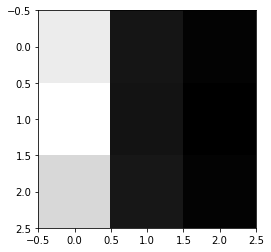

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(A_np,cmap='gray')